In [1]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import math

In [6]:
# Read data from files available
# gender_income_df = pd.read_excel('/content/drive/My Drive/CS506 DataScience/Final Project/Deliverable 1/poverty_line_analysis/Gender_Income_Distribution.xlsx', sheet_name="Data")
gender_income_df = pd.read_excel('./Gender_Income_Distribution.xlsx', sheet_name="Data")

In [7]:
gender_income_df

,Label,Total,Percent,Male,Male Percent,Female,Female Percent
0,Population 16 years and over with earnings,"402,258","402,258","196,249","196,249","206,009","206,009"
1,Median earnings (dollars),"49,039",(X),"52,862",(X),"43,406",(X)
2,"FULL-TIME, YEAR-ROUND WORKERS WITH EARNINGS","242,302","242,302","124,769","124,769","117,533","117,533"
3,"$1 to $9,999 or loss","4,095",1.7%,"1,744",1.4%,"2,351",2.0%
4,"$10,000 to $14,999","4,257",1.8%,"2,032",1.6%,"2,225",1.9%
5,"$15,000 to $24,999","8,611",3.6%,"4,646",3.7%,"3,965",3.4%
6,"$25,000 to $34,999","16,429",6.8%,"7,662",6.1%,"8,767",7.5%
7,"$35,000 to $49,999","34,587",14.3%,"16,982",13.6%,"17,605",15.0%
8,"$50,000 to $64,999","41,497",17.1%,"21,325",17.1%,"20,172",17.2%
9,"$65,000 to $74,999","19,534",8.1%,"8,812",7.1%,"10,722",9.1%


In [31]:
gender_income_df = gender_income_df[3:12]

In [32]:
gender_income_df

,Label,Total,Percent,Male,Male Percent,Female,Female Percent
3,"$1 to $9,999 or loss","4,095",1.7%,"1,744",1.4%,"2,351",2.0%
4,"$10,000 to $14,999","4,257",1.8%,"2,032",1.6%,"2,225",1.9%
5,"$15,000 to $24,999","8,611",3.6%,"4,646",3.7%,"3,965",3.4%
6,"$25,000 to $34,999","16,429",6.8%,"7,662",6.1%,"8,767",7.5%
7,"$35,000 to $49,999","34,587",14.3%,"16,982",13.6%,"17,605",15.0%
8,"$50,000 to $64,999","41,497",17.1%,"21,325",17.1%,"20,172",17.2%
9,"$65,000 to $74,999","19,534",8.1%,"8,812",7.1%,"10,722",9.1%
10,"$75,000 to $99,999","38,288",15.8%,"16,851",13.5%,"21,437",18.2%
11,"$100,000 or more","75,004",31.0%,"44,715",35.8%,"30,289",25.8%


In [33]:
gender_income_df.at[3, 'Label'] = '< $10,000'
gender_income_df.at[11, 'Label'] = '> $100,000'
gender_income_df

,Label,Total,Percent,Male,Male Percent,Female,Female Percent
3,"< $10,000","4,095",1.7%,"1,744",1.4%,"2,351",2.0%
4,"$10,000 to $14,999","4,257",1.8%,"2,032",1.6%,"2,225",1.9%
5,"$15,000 to $24,999","8,611",3.6%,"4,646",3.7%,"3,965",3.4%
6,"$25,000 to $34,999","16,429",6.8%,"7,662",6.1%,"8,767",7.5%
7,"$35,000 to $49,999","34,587",14.3%,"16,982",13.6%,"17,605",15.0%
8,"$50,000 to $64,999","41,497",17.1%,"21,325",17.1%,"20,172",17.2%
9,"$65,000 to $74,999","19,534",8.1%,"8,812",7.1%,"10,722",9.1%
10,"$75,000 to $99,999","38,288",15.8%,"16,851",13.5%,"21,437",18.2%
11,"> $100,000","75,004",31.0%,"44,715",35.8%,"30,289",25.8%


In [34]:
# Cleaning the data 
gender_income_df['Male Percent'] = (gender_income_df['Male Percent']).str.replace('%', '')
gender_income_df['Percent'] = (gender_income_df['Percent']).str.replace('%', '')
gender_income_df['Female Percent'] = (gender_income_df['Female Percent']).str.replace('%', '')
gender_income_df['Male Percent'] = gender_income_df['Male Percent'].astype(float)
gender_income_df['Percent'] = gender_income_df['Percent'].astype(float)
gender_income_df['Female Percent'] = gender_income_df['Female Percent'].astype(float)
gender_income_df

<ipython-input-34-a30c7174cd6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_income_df['Male Percent'] = (gender_income_df['Male Percent']).str.replace('%', '')
<ipython-input-34-a30c7174cd6b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_income_df['Percent'] = (gender_income_df['Percent']).str.replace('%', '')
<ipython-input-34-a30c7174cd6b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,Label,Total,Percent,Male,Male Percent,Female,Female Percent
3,"< $10,000","4,095",1.7,"1,744",1.4,"2,351",2.0
4,"$10,000 to $14,999","4,257",1.8,"2,032",1.6,"2,225",1.9
5,"$15,000 to $24,999","8,611",3.6,"4,646",3.7,"3,965",3.4
6,"$25,000 to $34,999","16,429",6.8,"7,662",6.1,"8,767",7.5
7,"$35,000 to $49,999","34,587",14.3,"16,982",13.6,"17,605",15.0
8,"$50,000 to $64,999","41,497",17.1,"21,325",17.1,"20,172",17.2
9,"$65,000 to $74,999","19,534",8.1,"8,812",7.1,"10,722",9.1
10,"$75,000 to $99,999","38,288",15.8,"16,851",13.5,"21,437",18.2
11,"> $100,000","75,004",31.0,"44,715",35.8,"30,289",25.8


In [41]:
gender_income_df['Label'] = gender_income_df['Label'].str.replace("to", "-")
gender_income_df

<ipython-input-41-a05a456e0fe1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_income_df['Label'] = gender_income_df['Label'].str.replace("to", "-")


,Label,Total,Percent,Male,Male Percent,Female,Female Percent
3,"< $10,000","4,095",1.7,"1,744",1.4,"2,351",2.0
4,"$10,000 - $14,999","4,257",1.8,"2,032",1.6,"2,225",1.9
5,"$15,000 - $24,999","8,611",3.6,"4,646",3.7,"3,965",3.4
6,"$25,000 - $34,999","16,429",6.8,"7,662",6.1,"8,767",7.5
7,"$35,000 - $49,999","34,587",14.3,"16,982",13.6,"17,605",15.0
8,"$50,000 - $64,999","41,497",17.1,"21,325",17.1,"20,172",17.2
9,"$65,000 - $74,999","19,534",8.1,"8,812",7.1,"10,722",9.1
10,"$75,000 - $99,999","38,288",15.8,"16,851",13.5,"21,437",18.2
11,"> $100,000","75,004",31.0,"44,715",35.8,"30,289",25.8


<Axes: xlabel='Label'>

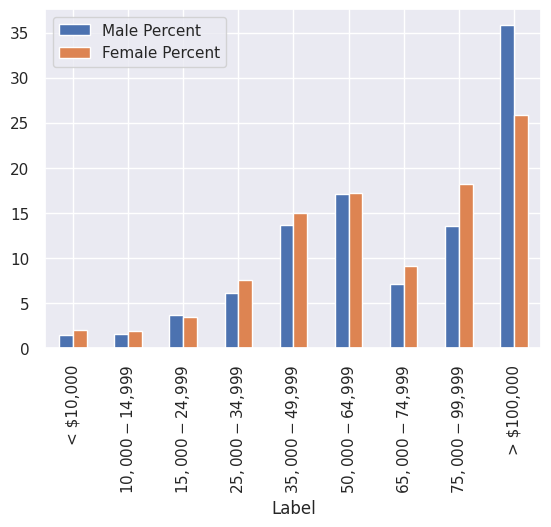

In [42]:
gender_income_df.plot(x="Label", y=["Male Percent", "Female Percent"], kind="bar")
